# Chapter 1: Data Cleaning and Modeling on Python

## Data Gathering

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Import and Display

In [2]:
#Importing and Displaying Data
headers = ["DateTime (dd/mm/yyyyy hh:mm:ss)", "Servo Lower Angle (°)","Servo Upper Angle (°)",
          "Roll Angle (°)", "Pitch Angle (°)", "Humidity (%)", "Temperature (°C)", "Heat Index (°C)",
          "Irradiance (W/m2)", "Voltage (V)", "Current (mA)"]
data = pd.read_csv("DATA 19_05_22.txt", header=None, index_col=False,
    names=headers, parse_dates= ["DateTime (dd/mm/yyyyy hh:mm:ss)"])
display(data.head())
print("Data Total Rows: {}\nData Total Columns: {}".format(data.shape[0], data.shape[1]))

,DateTime (dd/mm/yyyyy hh:mm:ss),Servo Lower Angle (°),Servo Upper Angle (°),Roll Angle (°),Pitch Angle (°),Humidity (%),Temperature (°C),Heat Index (°C),Irradiance (W/m2),Voltage (V),Current (mA)
0,2022-05-19 04:56:00,0,0,15.5504,-66.8076,93.0,27.2,32.2115,0.0,0.0,0.0
1,2022-05-19 04:56:05,0,23,18.0047,-47.4466,93.7,27.2,32.3448,0.0,0.0,0.0
2,2022-05-19 04:56:10,0,46,17.8869,-24.9693,93.8,27.2,32.3639,0.0,0.0,0.0
3,2022-05-19 04:56:15,0,69,20.1395,-6.8439,93.7,27.1,32.0455,0.0,0.0,0.0
4,2022-05-19 04:56:20,0,92,18.2653,16.4409,93.8,27.1,32.0641,0.0,0.0,0.0


Data Total Rows: 10246
Data Total Columns: 11


In [3]:
data.describe()

,DateTime (dd/mm/yyyyy hh:mm:ss),Servo Lower Angle (°),Servo Upper Angle (°),Roll Angle (°),Pitch Angle (°),Humidity (%),Temperature (°C),Heat Index (°C),Irradiance (W/m2),Voltage (V),Current (mA)
count,10246,10246.000000,10246.000000,10246.000000,10246.000000,10100.000000,10100.000000,10100.000000,10246.000000,10232.000000,10232.000000
mean,2022-05-19 12:02:53.806070784,89.705739,45.988776,2.932538,-27.246695,59.662436,38.137990,51.717315,102.487408,0.746244,21.123944
min,2022-05-19 04:56:00,0.000000,0.000000,-15.914300,-88.719000,28.800000,25.600000,27.135600,0.000000,0.000000,0.000000
25%,2022-05-19 08:29:26.249999872,45.000000,23.000000,-7.956250,-58.117750,38.800000,30.400000,37.445000,43.046750,0.260800,7.900000
50%,2022-05-19 12:02:52.500000,90.000000,46.000000,2.863500,-26.004200,57.600000,37.100000,48.983150,92.420450,0.746100,21.100000
75%,2022-05-19 15:36:19.750000128,135.000000,69.000000,14.529500,3.724350,75.100000,46.200000,67.536325,170.290550,1.271600,35.700000
max,2022-05-19 19:10:07,180.000000,92.000000,21.027800,27.078000,99.900000,56.100000,86.333200,239.984500,1.945300,53.200000
std,NaN,63.702569,32.527704,12.180201,33.273733,21.728205,8.727385,16.125929,70.963683,0.528144,14.575224


In [4]:
display(pd.DataFrame(data.isna().sum(), columns=["Total Nan Values"]).T)

,DateTime (dd/mm/yyyyy hh:mm:ss),Servo Lower Angle (°),Servo Upper Angle (°),Roll Angle (°),Pitch Angle (°),Humidity (%),Temperature (°C),Heat Index (°C),Irradiance (W/m2),Voltage (V),Current (mA)
Total Nan Values,0,0,0,0,0,146,146,146,0,14,14


~ The nan/missing values from the "Humidity", "Temperature", and "Heat Index" columns are caused by the low sampling rate capability of the sensor and the library used which is expected.

~ The nan/missing values from the "Voltage" and "Current" columns mostly occur when the sun is down or no current was produced from the solar panel, the developers of the product ensures that quality data is being recorded so a Nan value was used to record instead for this scenario.

## Data Cleaning

~ Imputation process for "Temperature", "Humidity", and "Heat Index" columns is to find the average of the nearest previous not-Nan value and nearest next not-Nan value since these values don't really much differ from each other within a minute of timeframe.

In [5]:
col_to_clean = ["Humidity (%)", "Temperature (°C)", "Heat Index (°C)"]
display(data[col_to_clean])

,Humidity (%),Temperature (°C),Heat Index (°C)
0,93.0,27.2,32.2115
1,93.7,27.2,32.3448
2,93.8,27.2,32.3639
3,93.7,27.1,32.0455
4,93.8,27.1,32.0641
...,...,...,...
10241,91.9,27.5,32.8921
10242,91.8,27.4,32.5728
10243,91.8,27.4,32.5728
10244,91.9,27.4,32.5927


In [6]:
#Find closest previous value that is not a Nan value relative to the row where a Nan value is to be imputed
def FindPreviousNotNan(current_row, pd_series): #
    i=current_row-1
    val = np.nan
    pd_series_min_pos = 0
    while i>=pd_series_min_pos:
        if np.isnan(pd_series.values[i]):
            i-=1
        else:
            val = pd_series.values[i]
            break
    return val    

#Find closest next value that is not a Nan value relative to the row where a Nan value is to be imputed
def FindNextNotNan(current_row, pd_series): 
    i=current_row+1
    val=np.nan
    pd_series_max_pos = len(pd_series)-1
    while i<=pd_series_max_pos:
        if np.isnan(pd_series.values[i]):
            i+=1
        else:
            val = pd_series.values[i]
            break
    return val     

In [7]:
#Impute rows where Nan values are found
#It will get the average of previous and next row values that are not Nan
#If all of the previous row values are Nan but next row value is not Nan then the value to be imputed is the next value, vice versa
def ImputeColumn(pd_dataframe, column):
    for i in range(len(pd_dataframe)):
        current_val = pd_dataframe[column].values[i]
        previous_val = 0
        next_val = 0
        if np.isnan(current_val):
            previous_val = FindNextNotNan(i,pd_dataframe[column])
            next_val = FindPreviousNotNan(i,pd_dataframe[column])
            if not np.isnan(previous_val) and not np.isnan(next_val):
                pd_dataframe[column].values[i] = np.mean([previous_val,next_val])
            elif np.isnan(previous_val) and np.isnan(next_val):
                pd_dataframe[column].values[i] = np.nan
            else:
                if np.isnan(previous_val):
                    pd_dataframe[column].values[i] = next_val
                else:
                    pd_dataframe[column].values[i] = previous_val

In [8]:
print("Sample Rows Before Data Imputation")
display(data.loc[139:141,col_to_clean])
display(data.loc[199:201,col_to_clean])

for col in col_to_clean:
    ImputeColumn(data, col)

display(pd.DataFrame(data.isna().sum(), columns=["Total Nan Values"]).T)
print("Sample Rows After Data Imputation")
display(data.loc[139:141,col_to_clean])
display(data.loc[199:201,col_to_clean])


Sample Rows Before Data Imputation


,Humidity (%),Temperature (°C),Heat Index (°C)
139,97.5,25.8,27.7138
140,NaN,NaN,NaN
141,97.6,25.8,27.7161


,Humidity (%),Temperature (°C),Heat Index (°C)
199,98.4,25.7,27.4298
200,NaN,NaN,NaN
201,98.5,25.7,27.4313


,DateTime (dd/mm/yyyyy hh:mm:ss),Servo Lower Angle (°),Servo Upper Angle (°),Roll Angle (°),Pitch Angle (°),Humidity (%),Temperature (°C),Heat Index (°C),Irradiance (W/m2),Voltage (V),Current (mA)
Total Nan Values,0,0,0,0,0,0,0,0,0,14,14


Sample Rows After Data Imputation


,Humidity (%),Temperature (°C),Heat Index (°C)
139,97.50,25.8,27.71380
140,97.55,25.8,27.71495
141,97.60,25.8,27.71610


,Humidity (%),Temperature (°C),Heat Index (°C)
199,98.40,25.7,27.42980
200,98.45,25.7,27.43055
201,98.50,25.7,27.43130


~ Imputation process for "Voltage" and "Current" columns is to find the average of the nearest previous not-Nan value and nearest next not-Nan value (just like the same with the "Humidity", "Temperature", and "Heat Index" columns)  since these values don't really much differ from when the sun is down and is more likely to be approximately equal to zero.

In [9]:
col_to_clean = ["Voltage (V)", "Current (mA)"]

print("Sample Rows Before Data Imputation")
display(data.loc[132:134,col_to_clean])
display(data.loc[9441:9445,col_to_clean])

for col in col_to_clean:
    ImputeColumn(data, col)

display(pd.DataFrame(data.isna().sum(), columns=["Total Nan Values"]).T)
print("Sample Rows After Data Imputation")
display(data.loc[132:134,col_to_clean])
display(data.loc[9441:9445,col_to_clean])

Sample Rows Before Data Imputation


,Voltage (V),Current (mA)
132,0.0,0.1
133,NaN,NaN
134,0.0,0.0


,Voltage (V),Current (mA)
9441,0.0,0.1
9442,NaN,NaN
9443,NaN,NaN
9444,NaN,NaN
9445,0.0,0.0


,DateTime (dd/mm/yyyyy hh:mm:ss),Servo Lower Angle (°),Servo Upper Angle (°),Roll Angle (°),Pitch Angle (°),Humidity (%),Temperature (°C),Heat Index (°C),Irradiance (W/m2),Voltage (V),Current (mA)
Total Nan Values,0,0,0,0,0,0,0,0,0,0,0


Sample Rows After Data Imputation


,Voltage (V),Current (mA)
132,0.0,0.10
133,0.0,0.05
134,0.0,0.00


,Voltage (V),Current (mA)
9441,0.0,0.1000
9442,0.0,0.0500
9443,0.0,0.0250
9444,0.0,0.0125
9445,0.0,0.0000


## Exploratory Data Analysis

In [10]:
data["Power (mW)"] = data["Voltage (V)"]*data["Current (mA)"]
display(data)

,DateTime (dd/mm/yyyyy hh:mm:ss),Servo Lower Angle (°),Servo Upper Angle (°),Roll Angle (°),Pitch Angle (°),Humidity (%),Temperature (°C),Heat Index (°C),Irradiance (W/m2),Voltage (V),Current (mA),Power (mW)
0,2022-05-19 04:56:00,0,0,15.5504,-66.8076,93.0,27.2,32.2115,0.0,0.0,0.0,0.0
1,2022-05-19 04:56:05,0,23,18.0047,-47.4466,93.7,27.2,32.3448,0.0,0.0,0.0,0.0
2,2022-05-19 04:56:10,0,46,17.8869,-24.9693,93.8,27.2,32.3639,0.0,0.0,0.0,0.0
3,2022-05-19 04:56:15,0,69,20.1395,-6.8439,93.7,27.1,32.0455,0.0,0.0,0.0,0.0
4,2022-05-19 04:56:20,0,92,18.2653,16.4409,93.8,27.1,32.0641,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10241,2022-05-19 19:09:47,0,92,20.5672,24.4719,91.9,27.5,32.8921,0.0,0.0,0.0,0.0
10242,2022-05-19 19:09:52,45,0,12.3812,-74.3377,91.8,27.4,32.5728,0.0,0.0,0.0,0.0
10243,2022-05-19 19:09:57,45,23,11.3962,-51.3019,91.8,27.4,32.5728,0.0,0.0,0.0,0.0
10244,2022-05-19 19:10:02,45,46,14.6790,-24.8913,91.9,27.4,32.5927,0.0,0.0,0.0,0.0


In [11]:
power_pd = pd.pivot_table(data, values = "Power (mW)", index="Servo Lower Angle (°)", columns="Servo Upper Angle (°)", aggfunc=np.mean)
display(power_pd.style.set_caption("Average Power (mW) Delivered based on Servo Angle Positions"))

Servo Upper Angle (°),0,23,46,69,92
Servo Lower Angle (°),,,,,
0,18.339827,25.189814,27.510043,26.540156,22.891166
45,19.411268,25.378231,27.935678,26.228431,21.922363
90,18.139075,24.721523,27.536104,26.373132,22.013466
135,14.883955,23.227739,27.063587,27.014111,23.741312
180,10.729783,19.683897,25.531714,27.449549,26.176851


In [12]:
row,col = np.where(power_pd.values==power_pd.values.max())
print("According to data gathered (on the basis of maximum average power delivered),\nthe solar panel holder can be designed on these following servo angles:\n")
print("Servo Lower Angle: {}°".format(power_pd.index[row[0]]))
print("Servo Upper Angle: {}°".format(power_pd.columns[col[0]]))
print("Max Average Power: {:.4f}mW".format(power_pd.values.max()))

row,col = np.where(power_pd.values==power_pd.values.min())
print("\n\nMeanwhile the sets of Servo Angle that delivers the lowest average power:\n")
print("Servo Lower Angle: {}°".format(power_pd.index[row[0]]))
print("Servo Upper Angle: {}°".format(power_pd.columns[col[0]]))
print("Min Average Power: {:.4f}mW".format(power_pd.values.min()))

According to data gathered (on the basis of maximum average power delivered),
the solar panel holder can be designed on these following servo angles:

Servo Lower Angle: 45°
Servo Upper Angle: 46°
Max Average Power: 27.9357mW


Meanwhile the sets of Servo Angle that delivers the lowest average power:

Servo Lower Angle: 180°
Servo Upper Angle: 0°
Min Average Power: 10.7298mW


In [13]:
#To see what are the corresponding Pitch and Roll angles of each sets/pair of servo angles we average the gathered data
# This can be used as the basis to design the inclination of the solar panel holders, but during installment phase, the installers
# must also take into consideration the inclincation of the base/roof/ground where the solar panels will be installed.
pitch_roll_pd = pd.pivot_table(data, values =["Roll Angle (°)", "Pitch Angle (°)"], index="Servo Lower Angle (°)", columns="Servo Upper Angle (°)", aggfunc=np.mean)
pitch_roll_pd.style.set_caption("Average Roll and Pitch Angles based on Servo Angle Positions")

In [14]:
print("Pitch Angle: {:.4f}°".format(pitch_roll_pd['Pitch Angle (°)'][46][45])) #Type of Angle, Serov Upper Angle, Servo Lower Angle
print("Roll Angle: {:.4f}°".format(pitch_roll_pd['Roll Angle (°)'][46][45])) #Type of Angle, Serov Upper Angle, Servo Lower Angle

Pitch Angle: -27.7554°
Roll Angle: 13.8526°


In [15]:
#Now lets look if the servo angles which delivered the max average power will also have the max average irradiance
irradiance_pd = pd.pivot_table(data, values = "Irradiance (W/m2)", index="Servo Lower Angle (°)", columns="Servo Upper Angle (°)", aggfunc=np.mean)
irradiance_pd.style.set_caption("Average Irradiance (W/m2) based on Servo Angle Positions")

Servo Upper Angle (°),0,23,46,69,92
Servo Lower Angle (°),,,,,
0,87.708637,105.832895,113.995901,112.480507,102.923733
45,90.463229,106.511786,114.941417,111.826011,99.273751
90,86.736455,104.551842,114.279525,112.167286,99.517700
135,78.990350,99.784179,112.267149,112.665229,103.919787
180,69.733758,91.900020,108.132492,112.527074,108.892678


In [16]:
row,col = np.where(irradiance_pd.values==irradiance_pd.values.max())
print("According to data gathered (on the basis of maximum average irradiance),\nthe solar panel holder can be designed on these following servo angles:\n")
print("Servo Lower Angle: {}°".format(irradiance_pd.index[row[0]]))
print("Servo Upper Angle: {}°".format(irradiance_pd.columns[col[0]]))
print("Max Irradiance: {:.4f}W/m2".format(irradiance_pd.values.max()))

row,col = np.where(irradiance_pd.values==irradiance_pd.values.min())
print("\n\nMeanwhile the sets of Servo Angle that has the lowest average irradiance:\n")
print("Servo Lower Angle: {}°".format(irradiance_pd.index[row[0]]))
print("Servo Upper Angle: {}°".format(irradiance_pd.columns[col[0]]))
print("Min Irradiance: {:.4f}W/m2".format(irradiance_pd.values.min()))

According to data gathered (on the basis of maximum average irradiance),
the solar panel holder can be designed on these following servo angles:

Servo Lower Angle: 45°
Servo Upper Angle: 46°
Max Irradiance: 114.9414W/m2


Meanwhile the sets of Servo Angle that has the lowest average irradiance:

Servo Lower Angle: 180°
Servo Upper Angle: 0°
Min Irradiance: 69.7338W/m2


In [17]:
#Let's visualize the power delivered all throughout the day by the module through moving average for a better visualization
data_power_roll = data[["DateTime (dd/mm/yyyyy hh:mm:ss)","Power (mW)"]].copy()
data_power_roll["Power (mW) Roll Ave 25"] = data["Power (mW)"].rolling(25).mean()
data_power_roll["Power (mW) Roll Ave 500"] = data["Power (mW)"].rolling(500).mean()
data_power_roll["Power (mW) Roll Ave 1000"] = data["Power (mW)"].rolling(1000).mean()
data_power_roll.rename(columns={"DateTime (dd/mm/yyyyy hh:mm:ss)":"DateTime"}, inplace=True)
data_power_roll.set_index("DateTime", inplace=True)
display(data_power_roll.head())

,Power (mW),Power (mW) Roll Ave 25,Power (mW) Roll Ave 500,Power (mW) Roll Ave 1000
DateTime,,,,
2022-05-19 04:56:00,0.0,NaN,NaN,NaN
2022-05-19 04:56:05,0.0,NaN,NaN,NaN
2022-05-19 04:56:10,0.0,NaN,NaN,NaN
2022-05-19 04:56:15,0.0,NaN,NaN,NaN
2022-05-19 04:56:20,0.0,NaN,NaN,NaN


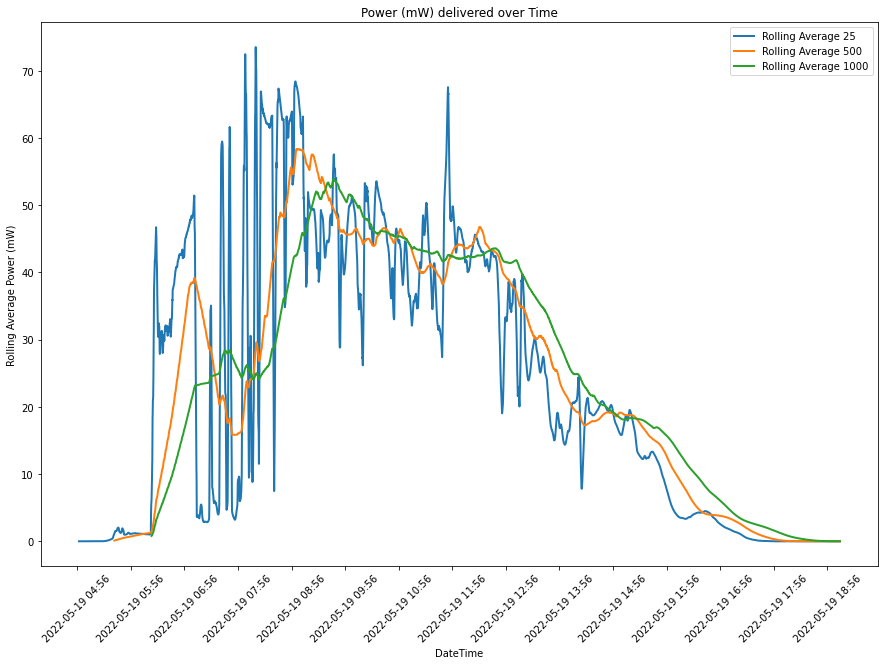

In [18]:
plt.figure(figsize=(15,10))
x_ticks = pd.date_range(start=data_power_roll.index.min(), end=data_power_roll.index.max(), freq="H")
plt.xticks(x_ticks, x_ticks.strftime("%Y-%m-%d %H:%M"), rotation=45, ha="center")

plt.plot(data_power_roll["Power (mW) Roll Ave 25"], linewidth=2, label="Rolling Average 25")
plt.plot(data_power_roll["Power (mW) Roll Ave 500"], linewidth=2, label="Rolling Average 500")
plt.plot(data_power_roll["Power (mW) Roll Ave 1000"], linewidth=2, label="Rolling Average 1000")
plt.title("Power (mW) delivered over Time")
plt.xlabel("DateTime")
plt.ylabel("Rolling Average Power (mW)")
plt.legend(loc="best")
plt.show()

The fluctuation of data in the line plot of "Rolling Ave 25" higlights how different servo positions will deliver different amounts of power and the fluctuation is also caused by partial shading of the clouds. To visualize this properly, let's create a graph of different pairs of servo position (both from Lower and Upper).

In [19]:
col_to_use = ["DateTime (dd/mm/yyyyy hh:mm:ss)", "Servo Lower Angle (°)","Servo Upper Angle (°)","Irradiance (W/m2)","Power (mW)"]
servo_pair_all_list = list()
servo_lower = data["Servo Lower Angle (°)"].unique()
servo_upper = data["Servo Upper Angle (°)"].unique()
print("Servo Lower Angles: ", servo_lower)
print("Servo Upper Angles: ", servo_upper)

for servo_lower_angle in servo_lower:
    servo_pairings = list()
    for servo_upper_angle in servo_upper:
        servo_pair_filtered = data[(data["Servo Lower Angle (°)"]==servo_lower_angle) & (data["Servo Upper Angle (°)"]==servo_upper_angle)][col_to_use]
        servo_pair_filtered.rename(columns={"DateTime (dd/mm/yyyyy hh:mm:ss)":"DateTime"}, inplace=True)
        servo_pair_filtered.set_index("DateTime", inplace=True)
        servo_pairings.append(servo_pair_filtered)
    servo_pair_all_list.append(servo_pairings)
    
display(servo_pair_all_list[0][0].head(5)) # Servo Lower: 0°, Servo Upper 0°
display(servo_pair_all_list[2][3].head(5)) # Servo Lower: 90°, Servo Upper 69°

Servo Lower Angles:  [  0  45  90 135 180]
Servo Upper Angles:  [ 0 23 46 69 92]


,Servo Lower Angle (°),Servo Upper Angle (°),Irradiance (W/m2),Power (mW)
DateTime,,,,
2022-05-19 04:56:00,0,0,0.0,0.0
2022-05-19 04:58:05,0,0,0.0,0.0
2022-05-19 05:00:10,0,0,0.0,0.0
2022-05-19 05:02:15,0,0,0.0,0.0
2022-05-19 05:04:20,0,0,0.0,0.0


,Servo Lower Angle (°),Servo Upper Angle (°),Irradiance (W/m2),Power (mW)
DateTime,,,,
2022-05-19 04:57:05,90,69,0.000,0.0
2022-05-19 04:59:10,90,69,0.000,-0.0
2022-05-19 05:01:15,90,69,0.000,-0.0
2022-05-19 05:03:20,90,69,0.000,0.0
2022-05-19 05:05:25,90,69,0.233,0.0


-- Graphing Rolling Average of Power (mW) of Different Servo Angle Pairs --

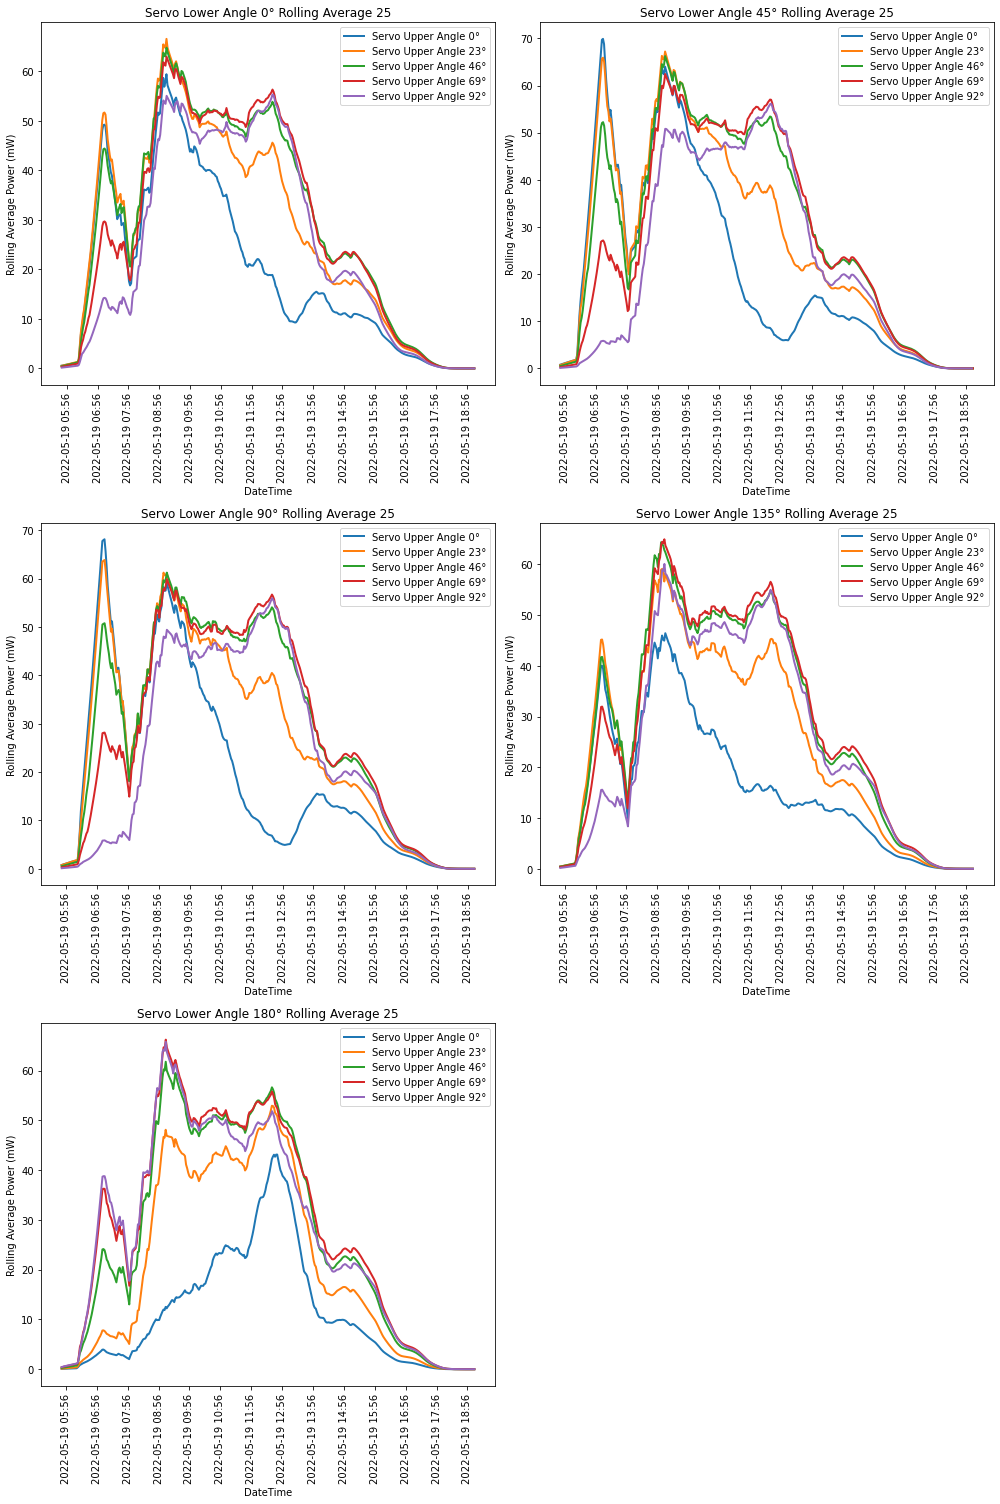

In [20]:
fig = plt.figure(figsize=(14, 21))
for i in range(len(servo_pair_all_list)):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title("Servo Lower Angle {}° Rolling Average 25".format(servo_lower[i]))
    ax.set_xlabel("DateTime")
    ax.set_ylabel("Rolling Average Power (mW)")
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks.strftime("%Y-%m-%d %H:%M"))
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
    for j in range(len(servo_pair_all_list[i])):
        ax.plot(servo_pair_all_list[i][j]["Power (mW)"].rolling(25).mean(), linewidth=2, label="Servo Upper Angle {}°".format(servo_upper[j]))
    ax.legend(loc="best")
fig.tight_layout()
plt.show()

-- Graphing Rolling Average of Irradiance (W/m2) of Different Servo Angle Pairs --

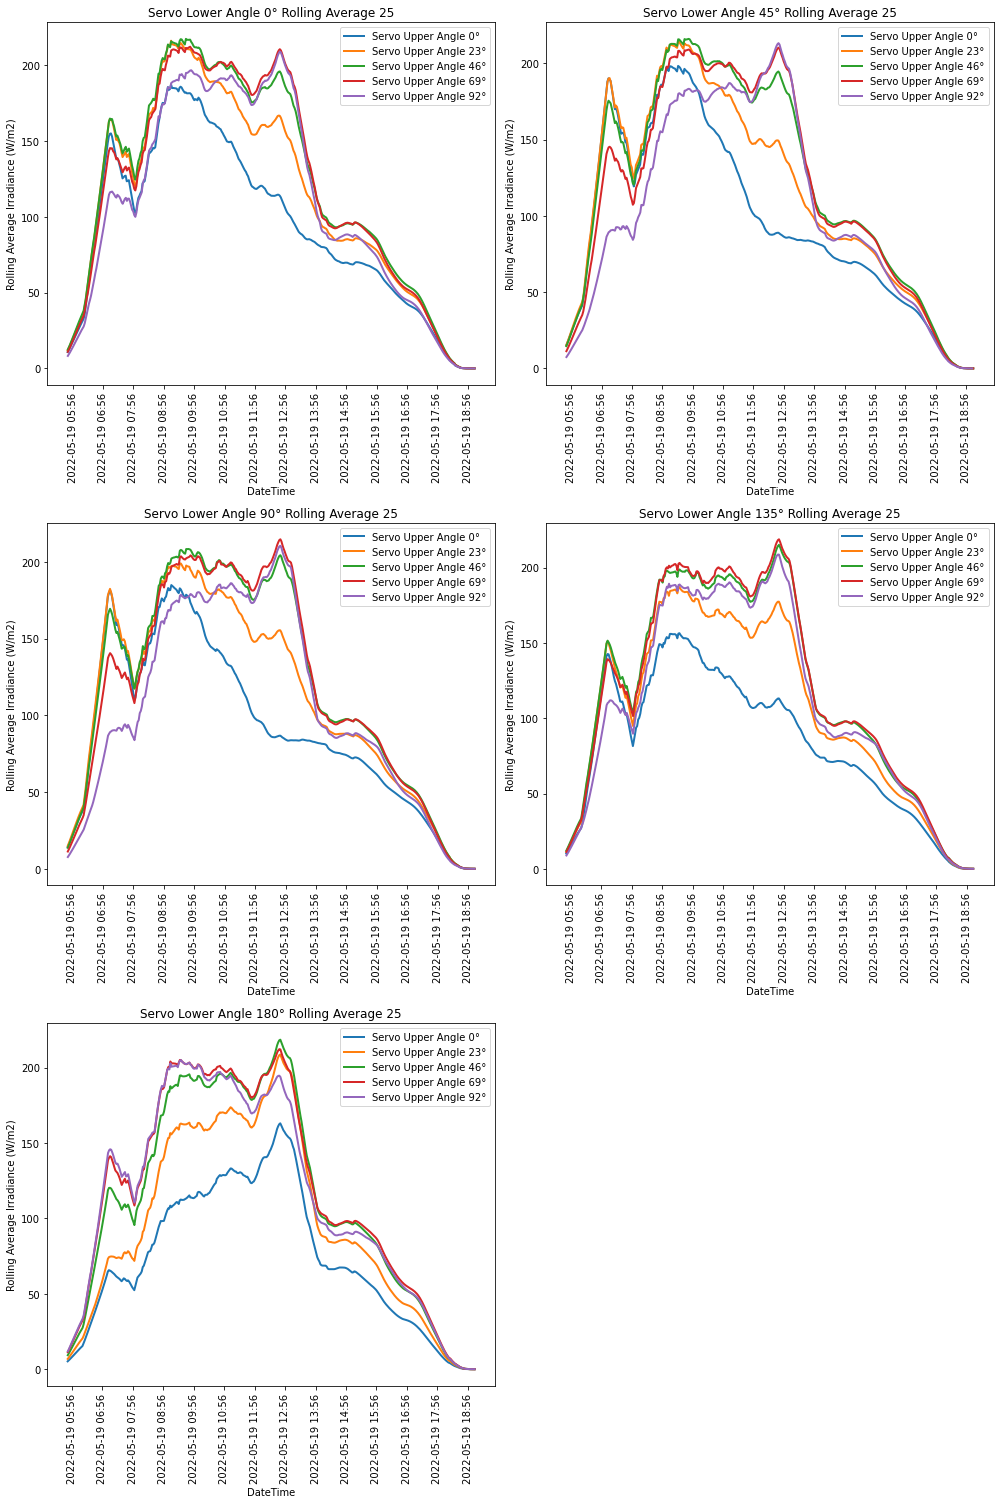

In [21]:
fig = plt.figure(figsize=(14, 21))
for i in range(len(servo_pair_all_list)):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title("Servo Lower Angle {}° Rolling Average 25".format(servo_lower[i]))
    ax.set_xlabel("DateTime")
    ax.set_ylabel("Rolling Average Irradiance (W/m2)")
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks.strftime("%Y-%m-%d %H:%M"))
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
    for j in range(len(servo_pair_all_list[i])):
        ax.plot(servo_pair_all_list[i][j]["Irradiance (W/m2)"].rolling(25).mean(), linewidth=2, label="Servo Upper Angle {}°".format(servo_upper[j]))
    ax.legend(loc="best")
fig.tight_layout()
plt.show()

## Model Development

In [22]:
from sklearn.model_selection import train_test_split

columns_rename=["DateTime","Hour","Minute","Second","Servo Lower","Servo Upper", "Power (mW)"]
data_to_model =pd.concat([data["DateTime (dd/mm/yyyyy hh:mm:ss)"],
                        data["DateTime (dd/mm/yyyyy hh:mm:ss)"].dt.hour,
                        data["DateTime (dd/mm/yyyyy hh:mm:ss)"].dt.minute,
                        data["DateTime (dd/mm/yyyyy hh:mm:ss)"].dt.second,
                        data.iloc[:,1:3],data["Power (mW)"]], axis=1)
data_to_model.columns = columns_rename
data_to_model.set_index("DateTime", inplace=True)
display(data_to_model.iloc[:,:-1].head().style.set_caption("Predictor Variables to Use"))

x_ticks = pd.date_range(start=data_to_model.index.min(), end=data_to_model.index.max(), freq="H")
X_trainval, X_test, y_trainval, y_test = train_test_split(data_to_model.iloc[:,:-1], data_to_model["Power (mW)"], random_state=47)

,Hour,Minute,Second,Servo Lower,Servo Upper
DateTime,,,,,
2022-05-19 04:56:00,4,56,0,0,0
2022-05-19 04:56:05,4,56,5,0,23
2022-05-19 04:56:10,4,56,10,0,46
2022-05-19 04:56:15,4,56,15,0,69
2022-05-19 04:56:20,4,56,20,0,92


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

def grid_search_report(regressor, param_grid, X_trainval, X_test, y_trainval, y_test, x_ticks,
                       refit="r2", scoring=["r2","neg_mean_absolute_error"], cv=5):
                        #setting default values
    
    grid = GridSearchCV(regressor, param_grid=param_grid, scoring=scoring, refit=refit, cv=cv)
    grid.fit(X_trainval, y_trainval)
    print("Regression Model used: {}".format(regressor.__class__.__name__ ))
    print("Grid Search Scorer/s used: {}".format(scoring))
    print("Grid Search Scorer used to find best parameters: {}".format(refit))
    print("Best parameters: ", grid.best_params_)
    print("Best cross-validation score ({}): {:.4f}\n...".format(refit,grid.best_score_))

    #Predict both X_trainval and X_test for scoring and plotting
    y_trainval_pred=grid.predict(X_trainval)
    y_test_pred=grid.predict(X_test)
    
    #Print Metrics
    print("R2 Score:")
    print("Train-Validation Set: {:.4f}".format(grid.score(X_trainval, y_trainval)))
    print("Test Set: {:.4f}".format(grid.score(X_test, y_test)))
    print("Mean Absolute Error:")
    print("Train-Validation Set: {:.4f}mW".format(mean_absolute_error(y_trainval, y_trainval_pred)))
    print("Test Set: {:.4f}mW".format(mean_absolute_error(y_test, y_test_pred)))
        
    #Create dataframe with columns y_trainval_actual and y_trainval_predict with index 
        #from X_trainval.index which is the corresponding DateTime
    y_trainval_actual_pred = pd.DataFrame({"Power (mW) Actual":y_trainval.values, "Power (mW) Predict":y_trainval_pred}).set_index(X_trainval.index)
    #Create dataframe with columns y_test_actual and y_test_predict with index 
        #from X_test.index which is the corresponding DateTime
    y_test_actual_pred = pd.DataFrame({"Power (mW) Actual":y_test.values, "Power (mW) Predict":y_test_pred}).set_index(X_test.index)
    
    #Display DataFrame both from TrainVal set and Test set
    display(y_trainval_actual_pred.head().style.set_caption("TrainValidation Set: Actual vs. Predicted Power (mW)"))
    display(y_test_actual_pred.head().style.set_caption("Test Set: Actual vs. Predicted Predicted Power (mW)"))
    
    #Plot both TrainValidation and Test Set: Actual vs. Predicted
    fig = plt.figure(figsize=(14,7))
    for (subplot, y_set) in zip([1,2],[y_trainval_actual_pred,y_test_actual_pred]):
        ax = fig.add_subplot(1,2,subplot)
        if subplot==1 :
            ax.set_title("TrainValidation Set: Actual vs. Predicted (Rolling Average Power (mW))")
        elif subplot == 2:
            ax.set_title("Test Set: Actual vs. Predicted (Rolling Average Power (mW))")
        ax.set_xlabel("DateTime")
        ax.set_ylabel("Rolling Average Power (mW)")
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_ticks.strftime("%Y-%m-%d %H:%M"))
        plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
        #Plot Actual
        ax.plot(y_set.loc[:,"Power (mW) Actual"].sort_index().rolling(25).mean(), linewidth=2, label="Power (mW) Actual")
        #Plot Predicted
        ax.plot(y_set.loc[:,"Power (mW) Predict"].sort_index().rolling(25).mean(), linewidth=2, label="Power (mW) Predict")
        ax.legend(loc="best")
    fig.tight_layout()
    plt.show()
    
    return (grid.best_estimator_, grid.cv_results_) #return best estimator and cv results

Regression Model used: RandomForestRegressor
Grid Search Scorer/s used: ['r2', 'neg_mean_absolute_error']
Grid Search Scorer used to find best parameters: r2
Best parameters:  {'criterion': 'squared_error', 'max_depth': None, 'n_estimators': 500}
Best cross-validation score (r2): 0.9340
...
R2 Score:
Train-Validation Set: 0.9920
Test Set: 0.9384
Mean Absolute Error:
Train-Validation Set: 0.8432mW
Test Set: 2.3082mW


,Power (mW) Actual,Power (mW) Predict
DateTime,,
2022-05-19 05:16:30,0.000050,0.000080
2022-05-19 08:30:50,60.797730,63.327226
2022-05-19 18:54:04,0.000000,0.000000
2022-05-19 06:54:15,19.418050,19.405335
2022-05-19 16:06:51,3.403700,3.257295


,Power (mW) Actual,Power (mW) Predict
DateTime,,
2022-05-19 14:21:46,13.092480,11.600516
2022-05-19 08:23:10,72.742500,65.504031
2022-05-19 18:33:27,0.000000,0.000000
2022-05-19 16:09:31,4.313120,4.238830
2022-05-19 17:14:26,1.174860,1.192806


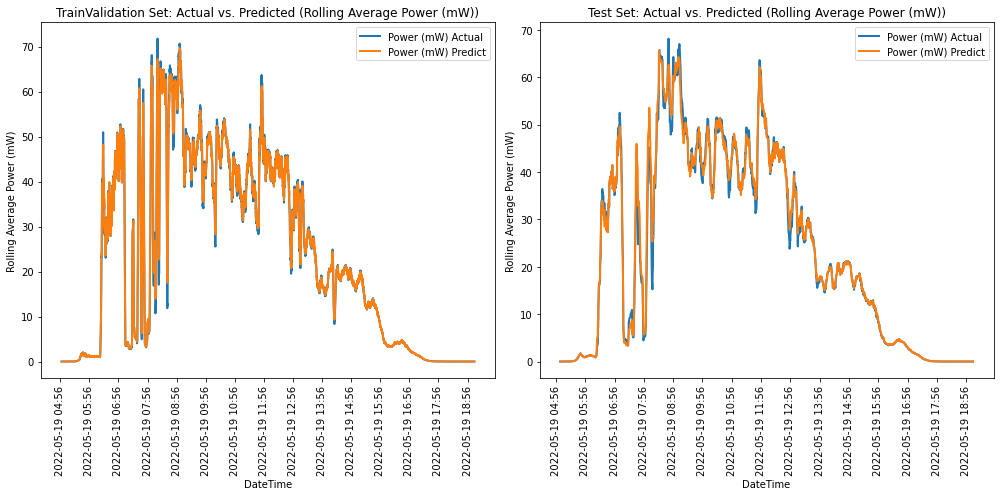

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_param_grid = {"n_estimators":[200,500,700],
                "criterion":["squared_error", "absolute_error"],
                "max_depth":[5,None]}

tup_rf=grid_search_report(RandomForestRegressor(random_state=47, n_jobs=-1), rf_param_grid, X_trainval, X_test, y_trainval, y_test, x_ticks)

Regression Model used: GradientBoostingRegressor
Grid Search Scorer/s used: ['r2', 'neg_mean_absolute_error']
Grid Search Scorer used to find best parameters: r2
Best parameters:  {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}
Best cross-validation score (r2): 0.9372
...
R2 Score:
Train-Validation Set: 0.9989
Test Set: 0.9524
Mean Absolute Error:
Train-Validation Set: 0.5160mW
Test Set: 2.7913mW


,Power (mW) Actual,Power (mW) Predict
DateTime,,
2022-05-19 05:16:30,0.000050,-0.859534
2022-05-19 08:30:50,60.797730,62.765559
2022-05-19 18:54:04,0.000000,-0.238554
2022-05-19 06:54:15,19.418050,19.688915
2022-05-19 16:06:51,3.403700,3.540735


,Power (mW) Actual,Power (mW) Predict
DateTime,,
2022-05-19 14:21:46,13.092480,13.224717
2022-05-19 08:23:10,72.742500,65.401428
2022-05-19 18:33:27,0.000000,-0.252414
2022-05-19 16:09:31,4.313120,4.906825
2022-05-19 17:14:26,1.174860,0.644425


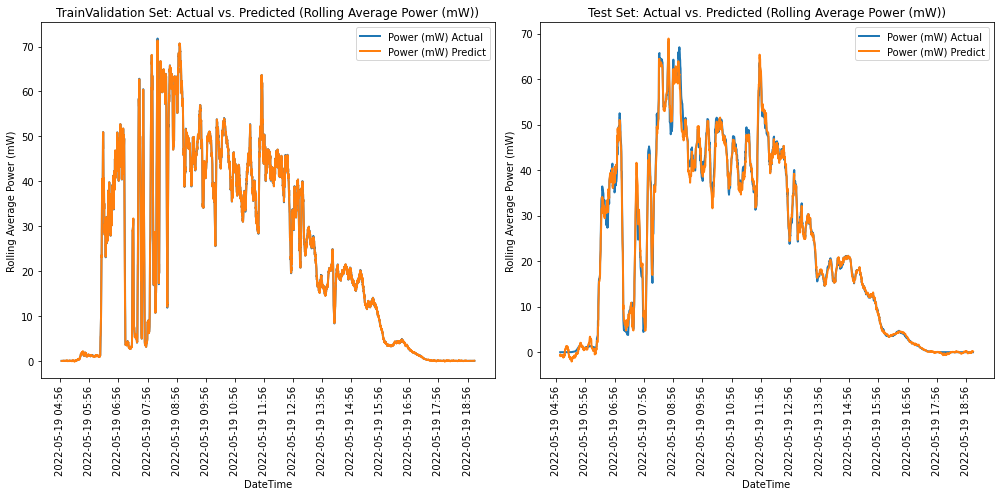

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_param_grid = {"learning_rate":[0.5, 0.8],
                 "n_estimators":[500,1000],
                 "max_depth":[5,None]}

tup_gbr=grid_search_report(GradientBoostingRegressor(random_state=47), gbr_param_grid, X_trainval, X_test, y_trainval, y_test, x_ticks)

Gradient Boosting Regressor has higher R2 score in the Cross Validation and Test Set compared to Random Forest Regressor but it also has a higher Mean Absolute Error compared to Random Forest Regresssor. Gradient Boosting Regressor also predict negative values while Random Forest only predicts zero as its lowest possible prediction value. To improve gradient boosting regressor's predicting performance and ability to consider zero/close to zero as its lower bounds of prediction, we can do logarithmic transformation but it would also increase/decrease the upper bounds of GBR's prediction and its MAE depending on the constant value applied to the transfromation. To remedy this situation, we will just transform GBR's negative prediction values to zero and see whether the MAE and R2 score of GBR will improve compared to Random Forest Regressor. If not, then we will use Random Forest Regressor as our final model for prediction.

In [26]:
#Create unclipped and clipped GBR lower bound prediction to zero 
GBR_trainval_predict_clipped = tup_gbr[0].predict(X_trainval).clip(min=0)
GBR_trainval_predict_unclipped = tup_gbr[0].predict(X_trainval)
GBR_test_predict_clipped = tup_gbr[0].predict(X_test).clip(min=0)
GBR_test_predict_unclipped = tup_gbr[0].predict(X_test)

In [27]:
print("Mean Absolute Error (Clipped):")
MAE_trainval_clipped = mean_absolute_error(y_trainval, GBR_trainval_predict_clipped)
MAE_test_clipped = mean_absolute_error(y_test, GBR_test_predict_clipped)
print("Train-Validation Set: {:.4f}mW".format(MAE_trainval_clipped))
print("Test Set: {:.4f}mW\n".format(MAE_test_clipped))

print("Mean Absolute Error (Unclipped):")
MAE_trainval_unclipped = mean_absolute_error(y_trainval, GBR_trainval_predict_unclipped)
MAE_test_unclipped = mean_absolute_error(y_test, GBR_test_predict_unclipped)
print("Train-Validation Set: {:.4f}mW".format(MAE_trainval_unclipped))
print("Test Set: {:.4f}mW\n".format(MAE_test_unclipped))

print("Based on the Test Set of Clipped and Unclipped Lower Bounds of GBR's Prediction...")
if MAE_test_clipped < MAE_test_unclipped:
    print("Assessment: Clip GBR's Prediction Lower Bounds ")
else:
    print("Assessment: Don't Clip GBR's Prediction Lower Bounds ")

Mean Absolute Error (Clipped):
Train-Validation Set: 0.4960mW
Test Set: 2.5328mW

Mean Absolute Error (Unclipped):
Train-Validation Set: 0.5160mW
Test Set: 2.7913mW

Based on the Test Set of Clipped and Unclipped Lower Bounds of GBR's Prediction...
Assessment: Clip GBR's Prediction Lower Bounds 


In [28]:
from sklearn.metrics import r2_score

print("R2 score (Clipped):")
R2_trainval_clipped = r2_score(y_trainval, GBR_trainval_predict_clipped)
R2_test_clipped = r2_score(y_test, GBR_test_predict_clipped)
print("Train-Validation Set: {:.4f}".format(R2_trainval_clipped))
print("Test Set: {:.4f}\n".format(R2_test_clipped))

print("R2 score (Unclipped):")
R2_trainval_unclipped = r2_score(y_trainval, GBR_trainval_predict_unclipped)
R2_test_unclipped = r2_score(y_test, GBR_test_predict_unclipped)
print("Train-Validation Set: {:.4f}".format(R2_trainval_unclipped))
print("Test Set: {:.4f}\n".format(R2_test_unclipped))

print("Based on the Test Set of Clipped and Unclipped Lower Bounds of GBR's Prediction...")
if R2_test_clipped > R2_test_unclipped:
    print("Assessment: Clip GBR's Prediction Lower Bounds ")
else:
    print("Assessment: Don't Clip GBR's Prediction Lower Bounds ")

R2 score (Clipped):
Train-Validation Set: 0.9989
Test Set: 0.9571

R2 score (Unclipped):
Train-Validation Set: 0.9989
Test Set: 0.9524

Based on the Test Set of Clipped and Unclipped Lower Bounds of GBR's Prediction...
Assessment: Clip GBR's Prediction Lower Bounds 


Based on the results of clipped and unclipped lower bounds of GBR's prediction, we can see that both MAE and R2 score improves and no scoring type became worse by clipping.

In [29]:
#Print CV results of GBR
display(pd.DataFrame(tup_gbr[1]))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_r2,split1_test_r2,...,std_test_r2,rank_test_r2,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
0,3.351898,0.031714,0.039304,0.007103,0.5,5,500,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti...",0.933608,0.948564,...,0.007111,2,-3.507921,-2.888245,-3.303775,-3.483559,-3.140597,-3.264819,0.230522,6
1,6.688477,0.045830,0.069408,0.005914,0.5,5,1000,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti...",0.934262,0.947373,...,0.006235,1,-3.474009,-2.919434,-3.275498,-3.455129,-3.133544,-3.251523,0.207717,5
2,0.837454,0.023958,0.014211,0.003068,0.5,None,500,"{'learning_rate': 0.5, 'max_depth': None, 'n_e...",0.856964,0.919309,...,0.020071,5,-3.403556,-2.503422,-2.759267,-2.854237,-2.876035,-2.879304,0.293658,1
3,0.983657,0.012567,0.018764,0.006255,0.5,None,1000,"{'learning_rate': 0.5, 'max_depth': None, 'n_e...",0.856964,0.919309,...,0.020071,5,-3.403556,-2.503422,-2.759267,-2.854237,-2.876035,-2.879304,0.293658,1
4,3.329809,0.044907,0.034372,0.006252,0.8,5,500,"{'learning_rate': 0.8, 'max_depth': 5, 'n_esti...",0.924047,0.936543,...,0.008085,4,-3.847653,-3.449686,-3.771965,-3.876077,-3.579821,-3.705040,0.164290,8
5,6.666747,0.033734,0.072478,0.007973,0.8,5,1000,"{'learning_rate': 0.8, 'max_depth': 5, 'n_esti...",0.923643,0.935632,...,0.007655,3,-3.850856,-3.474796,-3.776261,-3.852271,-3.553701,-3.701577,0.157396,7
6,0.487119,0.022181,0.009401,0.007676,0.8,None,500,"{'learning_rate': 0.8, 'max_depth': None, 'n_e...",0.853956,0.918235,...,0.020697,7,-3.420391,-2.521999,-2.776147,-2.863771,-2.885867,-2.893635,0.293374,3
7,0.659206,0.027875,0.009981,0.005731,0.8,None,1000,"{'learning_rate': 0.8, 'max_depth': None, 'n_e...",0.853956,0.918235,...,0.020697,7,-3.420391,-2.521999,-2.776147,-2.863771,-2.885867,-2.893635,0.293374,3


## Optimizing Servo Pair Angles

Based on the initial data gathered, we can already identify the best servo pair angles. But we can use the model that we developed to further gain insights or optimize the servo pair angles since the data we gathered only focused on specific sets of steps of servo angles.

In [30]:
#We previously identified that the pair of servo angles that has highest average power all through out the day were:
    #Servo Lower: 45
    #Servo Upper: 46
#Let's estimate the average power of other sets of servo pair angles (close to these servo angles which are (L: 45, U: 46))
#We will use the following data points
#Servo Lower Previous Bounds: 0,  #Servo Lower Next Bounds: 90,
#Servo Upper Previouse Bounds: 23, #Servo Upper Next Bounds: 69,

final_model = tup_gbr[0] #set our final model to GBR
servo_lower_set=np.linspace(0,90, num=11)
servo_upper_set=np.linspace(23,69, num=5)
print("Sets of Angle to Pair and Predict")
print("Servo lower set: ", servo_lower_set)
print("Servo upper set: ", servo_upper_set)

#Setup empty dataframe first filled with ones
servo_pairs_pred_ave_power = pd.DataFrame(1,index=servo_lower_set, columns=servo_upper_set)
servo_pairs_pred_ave_power.rename_axis("Servo Upper Angle", axis=1, inplace=True)
servo_pairs_pred_ave_power.rename_axis("Servo Lower Angle", axis=0, inplace=True)
for servo_lower_angle in servo_lower_set:
    for servo_upper_angle in servo_upper_set:
        data_to_predict=data_to_model.loc[:,:"Servo Upper"].copy() #get all x_predictor variables except y which is Power(mW) column
        data_to_predict["Servo Lower"] = servo_lower_angle
        data_to_predict["Servo Upper"] = servo_upper_angle
        power_predicted = final_model.predict(data_to_predict).clip(min=0) #clip predicted values such that no negative values in prediction
        average_power=np.mean(power_predicted)
        servo_pairs_pred_ave_power.loc[servo_lower_angle,servo_upper_angle] = average_power


display(servo_pairs_pred_ave_power.style.set_caption("Average Power (mW) Delivered based on Servo Angle Positions"))

Sets of Angle to Pair and Predict
Servo lower set:  [ 0.  9. 18. 27. 36. 45. 54. 63. 72. 81. 90.]
Servo upper set:  [23.  34.5 46.  57.5 69. ]


Servo Upper Angle,23.000000,34.500000,46.000000,57.500000,69.000000
Servo Lower Angle,,,,,
0.000000,25.593535,25.594966,27.957157,27.951605,26.719754
9.000000,25.593535,25.594966,27.957157,27.951605,26.719754
18.000000,25.593535,25.594966,27.957157,27.951605,26.719754
27.000000,25.594358,25.594790,28.110292,28.107796,26.617448
36.000000,25.594358,25.594790,28.110292,28.107796,26.617448
45.000000,25.594358,25.594790,28.110292,28.107796,26.617448
54.000000,25.587276,25.587709,28.103080,28.100583,26.609840
63.000000,25.587276,25.587709,28.103080,28.100583,26.609840
72.000000,24.593539,24.594033,27.609934,27.607437,26.364032


## Conclusions

Based on the prediciton models and data gathered, we can conclude that as for the current physical setup (location, current roofing materials and coatings used) where the device/module gathered the data, we can optimize the average power output of the solar panels during installment phase if we design the inclinations of our panel holders - the same way how the device/module identified its optimal inclinations (with estimated amount of tolerance) through the servo angle pairs which are - Servo Lower: 27°-45° and Servo Upper: 46° - 57.5°. But how can we design it based on pitch and roll angles?

Method 1: We can do these through setting up the device again to the physical location were it gathered the data, and set it up to move towards the optimal servo angle pairs and record its corresponding pitch and roll angles which will then be used to design the solar panel holders.

Method 2: We can also do these by training another machine learning model where we use Servo Lower and Servo Upper Angles as the predictor/X variables and the Pitch and Roll angles as the response/Y variables and then used the trained model to predict the pitch and roll angles of the optimal servo angle pairs.

But, it is highly recommeded to use Method 1. The results of other servo angle pairs are useful to set the amount of tolerance of the inclination angles on designing our solar panel holders. We can further improve our confidence of these optimization if we also create models where the variable we will be predicting is the Irradiance instead of Power.

## Recommendations

If more data and experimentations are done to other location and datetime, we can use the temperature and humidity variables to create a more generalized machine learning model if our goal is to improve efficiency of solar panels by improving temperature conditions. We could use the results to identify whether we need to improve roofing materials, or coatings, or choose the location that already have the best temperature conditions. We also recommend to develop the device even further to also record the yaw angles, and if possible to record the longitude, latitude, and altitude where the device was gathering data. This might be useful if we are to pool the data from different users and locations.

# Chapter 2: Transitioning to Cairo

Having successfully trained a model for optimizing solar panel positioning and angles, our next exploration involves investigating the correlation between power output and the irradiance data gathered by our module. Employing a linear regression model with power output as the predictor (X variable) and irradiance data as the response (Y variable), we aim to establish a quantitative relationship. The computed model will enable us to derive the average irradiance associated with each power level (mW) based on servo angle positions obtained in Chapter 1: Data Cleaning and Modeling on Python (Optimizing Servo Pair Angles). To enhance verifiability, we will seamlessly transition to Cairo & Orion, retrain the model, and conduct inferences within Cairo's environment, thereby ensuring the robustness and reliability of our machine learning model and its associated computations.

In [31]:
#Lets explore the correlation coefficient of power and irridiance from the raw data before training our Linear Regression Model
corr_matrix = np.corrcoef(power_pd.values.flatten(),irradiance_pd.values.flatten())
display(pd.DataFrame(corr_matrix, columns=["Power","Irradiance"], index=["Power","Irradiance"]))

,Power,Irradiance
Power,1.00000,0.99509
Irradiance,0.99509,1.00000


This demonstrates that irradiance and power have a strong relationship. As a result, we must optimize the orientation of our solar panel holder so that it receives the most irradiance on average throughout the day.

In [32]:
X = power_pd.values.reshape(-1, 1)
Y = irradiance_pd.values.flatten()

In [33]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.9902050433019366

In [34]:
servo_pairs_pred_ave_power_stacked = servo_pairs_pred_ave_power.stack().reset_index()
servo_pairs_pred_ave_power_stacked = servo_pairs_pred_ave_power_stacked.rename(columns={0:"Average Power (mW)"})
display(servo_pairs_pred_ave_power_stacked)

,Servo Lower Angle,Servo Upper Angle,Average Power (mW)
0,0.0,23.0,25.593535
1,0.0,34.5,25.594966
2,0.0,46.0,27.957157
3,0.0,57.5,27.951605
4,0.0,69.0,26.719754
5,9.0,23.0,25.593535
6,9.0,34.5,25.594966
7,9.0,46.0,27.957157
8,9.0,57.5,27.951605
9,9.0,69.0,26.719754


In [35]:
ave_irridiance = reg.predict(servo_pairs_pred_ave_power_stacked["Average Power (mW)"].values.reshape(-1,1))
servo_pairs_pred_ave_power_stacked["Average Irradiance (W/m2)"] = ave_irridiance
display(servo_pairs_pred_ave_power_stacked)

,Servo Lower Angle,Servo Upper Angle,Average Power (mW),Average Irradiance (W/m2)
0,0.0,23.0,25.593535,108.385501
1,0.0,34.5,25.594966,108.389398
2,0.0,46.0,27.957157,114.822175
3,0.0,57.5,27.951605,114.807056
4,0.0,69.0,26.719754,111.452449
5,9.0,23.0,25.593535,108.385501
6,9.0,34.5,25.594966,108.389398
7,9.0,46.0,27.957157,114.822175
8,9.0,57.5,27.951605,114.807056
9,9.0,69.0,26.719754,111.452449


Now that we have computed the average irridiance per each servo angle positions, let's convert the model we have trained on the python enviroment to cairo.

In [36]:
! scarb new sppom_linear_regression

Created `sppom_linear_regression` package.


In [37]:
import os
tensor_name =['X_values', 'Y_values']

def decimal_to_fp16x16(decimal_number):
    whole_number = int(decimal_number)
    fractional_part = int((decimal_number - whole_number) * 65536)  # Multiply by 2^16
    fp_number = (whole_number << 16) + fractional_part
    return fp_number

base_path = os.path.expanduser("sppom_linear_regression/src")

def generate_cairo_files(data, name):
    
    generated_path = os.path.join(base_path, 'generated')
    os.makedirs(generated_path, exist_ok=True)
    with open(os.path.join(generated_path, f"{name}.cairo"), "w") as f:
            f.write(
                "use array::ArrayTrait;\n" +
                "use orion::operators::tensor::{FP16x16Tensor, TensorTrait, Tensor};\n" +
                "use orion::numbers::{FixedTrait, FP16x16, FP16x16Impl};\n" +
                "\nfn {0}() -> Tensor<FP16x16>  ".format(name) + "{\n" +
                "    let mut shape = ArrayTrait::new();\n"
            )
            for dim in data.shape:
                f.write("    shape.append({0});\n".format(dim))
            f.write(
                "    let mut data = ArrayTrait::new();\n"
            )
            for val in np.nditer(data.flatten()):
                f.write("    data.append(FixedTrait::new({0}, {1} ));\n".format(abs(int(decimal_to_fp16x16(val))), str(val < 0).lower()))
            f.write(
                "let tensor = TensorTrait::<FP16x16>::new(shape.span(), data.span()); \n \n" +
                "return tensor;\n\n"+
                "}\n"
            )
    with open(os.path.join(base_path, 'generated.cairo'), 'w') as f:
        for param_name in tensor_name:
            f.write(f"mod {param_name};\n")

In [38]:
generate_cairo_files(X, 'X_values')
generate_cairo_files(Y, 'Y_values')

In [39]:
%%writefile sppom_linear_regression/src/lin_reg_func.cairo

use orion::operators::tensor::{Tensor, TensorTrait, FP16x16Tensor};
use orion::numbers::{FP16x16, FixedTrait};

/// Calculates the mean of a given 1D tensor.
fn calculate_mean(tensor_data: Tensor<FP16x16>) -> FP16x16 {
    let tensor_size = FixedTrait::<FP16x16>::new_unscaled(tensor_data.data.len(), false);

    let cumulated_sum = tensor_data.cumsum(0, Option::None(()), Option::None(()));
    let sum_result = cumulated_sum.data[tensor_data.data.len() - 1];
    let mean = *sum_result / tensor_size;

    return mean;
}

/// Calculates the deviation of each element from the mean of the provided 1D tensor.
fn deviation_from_mean(tensor_data: Tensor<FP16x16>) -> Tensor<FP16x16> {
    let mean_value = calculate_mean(tensor_data);

    let mut tensor_shape = array::ArrayTrait::new();
    tensor_shape.append(tensor_data.data.len());

    let mut deviation_values = array::ArrayTrait::new();

    let mut i: u32 = 0;
    loop {
        if i >= tensor_data.data.len() {
            break ();
        }
        let distance_from_mean = *tensor_data.data.at(i) - mean_value;
        deviation_values.append(distance_from_mean);
        i += 1;
    };

    let distance_from_mean_tensor = TensorTrait::<FP16x16>::new(
        tensor_shape.span(), deviation_values.span()
    );

    return distance_from_mean_tensor;
}


/// Calculates the beta value for linear regression.
fn compute_beta(x_values: Tensor<FP16x16>, y_values: Tensor<FP16x16>) -> FP16x16 {
    let x_deviation = deviation_from_mean(x_values);
    let y_deviation = deviation_from_mean(y_values);

    let x_y_covariance = x_deviation.matmul(@y_deviation);
    let x_variance = x_deviation.matmul(@x_deviation);

    let beta_value = *x_y_covariance.data.at(0) / *x_variance.data.at(0);

    return beta_value;
}

/// Calculates the intercept for linear regression.
fn compute_intercept(
    beta_value: FP16x16, x_values: Tensor<FP16x16>, y_values: Tensor<FP16x16>
) -> FP16x16 {
    let x_mean = calculate_mean(x_values);
    let y_mean = calculate_mean(y_values);

    let mx = beta_value * x_mean;
    let intercept = y_mean - mx;

    return intercept;
}

/// Predicts the y values using the provided x values and computed beta and intercept.
fn predict_y_values(
    beta_value: FP16x16, x_values: Tensor<FP16x16>, y_values: Tensor<FP16x16>
) -> Tensor<FP16x16> {
    let beta = compute_beta(x_values, y_values);
    let intercept = compute_intercept(beta_value, x_values, y_values);

    //create a tensor to hold all the y_pred values
    let mut y_pred_shape = array::ArrayTrait::new();
    y_pred_shape.append(y_values.data.len());

    let mut y_pred_vals = array::ArrayTrait::new();

    let mut i: u32 = 0;
    loop {
        if i >= y_values.data.len() {
            break ();
        }
        // (*x_values.data.at(i)).print();
        let predicted_value = beta * *x_values.data.at(i) + intercept;
        y_pred_vals.append(predicted_value);
        i += 1;
    };

    let y_pred_tensor = TensorTrait::<FP16x16>::new(y_pred_shape.span(), y_pred_vals.span());

    return y_pred_tensor;
}


/// Calculates the mean squared error between the true y values and the predicted y values.
fn compute_mse(y_values: Tensor<FP16x16>, y_pred_values: Tensor<FP16x16>) -> FP16x16 {
    let mut squared_diff_shape = array::ArrayTrait::new();
    squared_diff_shape.append(y_values.data.len());

    let mut squared_diff_vals = array::ArrayTrait::new();

    let mut i: u32 = 0;
    loop {
        if i >= y_values.data.len() {
            break ();
        }
        let diff = *y_values.data.at(i) - *y_pred_values.data.at(i);
        let squared_diff = diff * diff;
        squared_diff_vals.append(squared_diff);
        i += 1;
    };

    let squared_diff_tensor = TensorTrait::<FP16x16>::new(
        squared_diff_shape.span(), squared_diff_vals.span()
    );

    let mse = calculate_mean(squared_diff_tensor);

    return mse;
}

/// Calculates the R squared score.
fn calculate_r_score(y_values: Tensor<FP16x16>, y_pred_values: Tensor<FP16x16>) -> FP16x16 {
    let mean_y_value = calculate_mean(y_values);

    // creating the appropriate tensor shapes and empty arrays to populate values into
    let mut squared_diff_shape = array::ArrayTrait::new();
    squared_diff_shape.append(y_values.data.len());
    let mut squared_diff_vals = array::ArrayTrait::new();

    let mut squared_mean_diff_shape = array::ArrayTrait::new();
    squared_mean_diff_shape.append(y_values.data.len());
    let mut squared_mean_diff_vals = array::ArrayTrait::new();

    let mut i: u32 = 0;
    loop {
        if i >= y_values.data.len() {
            break ();
        }
        let diff_pred = *y_values.data.at(i) - *y_pred_values.data.at(i);
        let squared_diff = diff_pred * diff_pred;
        squared_diff_vals.append(squared_diff);

        let diff_mean = *y_values.data.at(i) - mean_y_value;
        let squared_mean_diff = diff_mean * diff_mean;
        squared_mean_diff_vals.append(squared_mean_diff);
        i += 1;
    };

    let squared_diff_tensor = TensorTrait::<FP16x16>::new(
        squared_diff_shape.span(), squared_diff_vals.span()
    );
    let squared_mean_diff_tensor = TensorTrait::<FP16x16>::new(
        squared_mean_diff_shape.span(), squared_mean_diff_vals.span()
    );

    let sum_squared_diff = squared_diff_tensor.cumsum(0, Option::None(()), Option::None(()));
    let sum_squared_mean_diff = squared_mean_diff_tensor
        .cumsum(0, Option::None(()), Option::None(()));

    let r_score = FixedTrait::new_unscaled(1, false)
        - *sum_squared_diff.data.at(y_values.data.len() - 1)
            / *sum_squared_mean_diff.data.at(y_values.data.len() - 1);

    return r_score;
}


Writing sppom_linear_regression/src/lin_reg_func.cairo


In [40]:
%%writefile sppom_linear_regression/src/test.cairo
use debug::PrintTrait;

use sppom_linear_regression::generated::X_values::X_values;
use sppom_linear_regression::generated::Y_values::Y_values;
use sppom_linear_regression::lin_reg_func::{
    calculate_mean, deviation_from_mean, compute_beta, compute_intercept, predict_y_values,
    compute_mse, calculate_r_score
};


#[test]
#[available_gas(99999999999999999)]
fn sppom_linear_regression_test() {
    // Fetching the x and y values
    let y_values = Y_values();
    let x_values = X_values();

    // (*x_values.data.at(18)).print();

    let beta_value = compute_beta(x_values, y_values);
    // beta_value.print();    // calculated gradient value

    let intercept_value = compute_intercept(beta_value, x_values, y_values);
    // intercept_value.print();   // calculated intercept value

    let y_pred = predict_y_values(beta_value, x_values, y_values);

    let mse = compute_mse(y_values, y_pred);
    // mse.print();       // mean squared error ouput

    let r_score = calculate_r_score(y_values, y_pred);
    r_score.print(); // accuracy of model around 0.9902050433019366

    assert(beta_value.mag > 0, 'x & y not positively correlated');
    assert(r_score.mag > 0, 'R-Squared needs to be above 0');
    assert(
        r_score.mag < 65536, 'R-Squared has to be below 65536'
    ); // 65536 represents ONE in fp16x16.
    assert(r_score.mag > 32768, 'Accuracy below 50% ');
}

Writing sppom_linear_regression/src/test.cairo


In [41]:
%%writefile sppom_linear_regression/src/lib.cairo

mod generated;
mod lin_reg_func;
mod test;

Overwriting sppom_linear_regression/src/lib.cairo


In [42]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Change the current working directory
new_directory = os.path.join(current_directory, "sppom_linear_regression")
os.chdir(new_directory)

# Verify the change
updated_directory = os.getcwd()
print("Updated Working Directory:", updated_directory)

Current Working Directory: C:\Users\Predator\Desktop\Personal Files\School Files\Starknet Infra Exploration Hackathon\SPPOM ZKML
Updated Working Directory: C:\Users\Predator\Desktop\Personal Files\School Files\Starknet Infra Exploration Hackathon\SPPOM ZKML\sppom_linear_regression


In [43]:
! scarb cairo-test -f sppom_linear_regression_test

   Compiling test(sppom_linear_regression_unittest) sppom_linear_regression v0.1.0 (C:\Users\Predator\Desktop\Personal Files\School Files\Starknet Infra Exploration Hackathon\SPPOM ZKML\sppom_linear_regression\Scarb.toml)
    Finished release target(s) in 25 seconds
testing sppom_linear_regression ...
running 1 tests
[DEBUG]	false                          	(raw: 0x66616c7365

[DEBUG]	                               	(raw: 0xfd7f 

test sppom_linear_regression::test::sppom_linear_regression_test ... ok (gas usage est.: 51105060)
test result: ok. 1 passed; 0 failed; 0 ignored; 0 filtered out;



## Conclusion

Now equipped with a verifiable model on Cairo, we can accurately estimate the corresponding average irradiance for each average power estimation derived from the Solar PV Positioning Optimizer Module (SPPOM) on Cairo. The synergy of Cairo and Orion ensures rigorous verification of our model's estimations and inferences, reinforcing the reliability of our results within the Orion framework.